In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

from VQLSSVM import VQLSSVM

np.set_printoptions(precision=4, suppress=True)

In [2]:
shots: int = 10000
gamma: float = 0.01 # regularization parameter
subsetSize: int = 7
classToFilterOut: int = 2

In [3]:
def prepareDataset(normalizeValues: bool = False, dataset: str = "iris") -> (np.ndarray, np.ndarray, np.array, np.array):
    if dataset == "iris":
        X,y = datasets.load_iris(return_X_y=True)
        X = X[y!=classToFilterOut]
        y = y[y!=classToFilterOut]
    elif dataset == "breastCancer":
        X,y = datasets.load_breast_cancer(return_X_y=True)
    elif dataset == "dummyData":
        X, y = datasets.make_classification(
            n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=45
        )
    else: 
        raise ValueError("Dataset not yet implemented")
    
    y: np.array = np.where(y == 0, -1, 1) # might cause some problems in a future

    if normalizeValues:
        max = np.max(X, axis=0)
        min = np.min(X, axis=0)
        X = (2*X - min - max) / (max - min)
    return train_test_split(X, y, test_size=(X.shape[0]-subsetSize)/(X.shape[0]))

In [4]:
xTrain, xTest, yTrain, yTest = prepareDataset(normalizeValues=True, dataset="iris")
print(xTrain)

[[ 0.2593 -0.25    0.7073  0.6471]
 [-0.037  -0.5833  0.4146  0.1765]
 [ 0.6296 -0.3333  0.7561  0.6471]
 [ 0.4815  0.0833  0.8049  0.7647]
 [ 0.037  -0.1667  0.561   0.2941]
 [-0.4815  0.25   -0.7073 -0.4118]
 [ 0.3333 -0.3333  0.4634  0.4118]]


Method: SPSA
Time to prepare circuits: 6.548147201538086
Time to minimize: 169.0704061985016268670226
{   'fun': 0.00020351305493360172,
    'jac': None,
    'nfev': 400,
    'nit': 200,
    'njev': None,
    'x': array([ 1.3815, -0.0182,  0.4199,  1.8469, -0.2246,  1.2617, -0.412 ,
       -1.8193, -0.2781])}


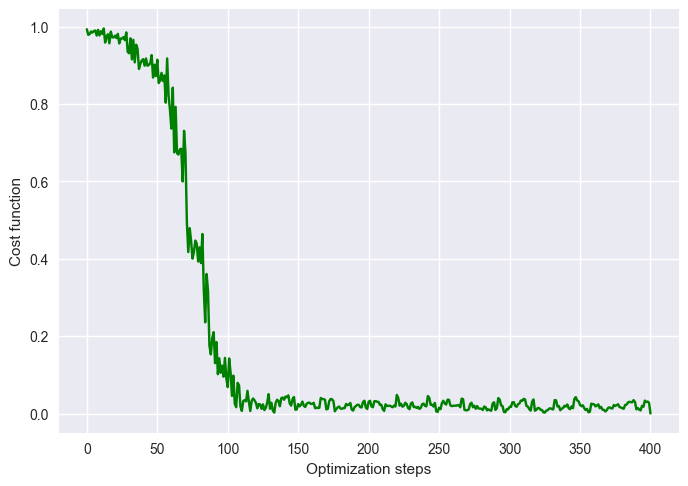

Cost history:
[0.993063106198659, 0.9786319272785237, 0.9806441464656677, 0.9873155793985279, 0.9845089455044281, 0.9885059132985251, 0.9897329763384035, 0.9768407358786186, 0.9914779790113284, 0.977029852835465, 0.9880439350013516, 0.9810893001211507, 0.9951143996060517, 0.9587117635603093, 0.9742031722064435, 0.9801957833842327, 0.9568011996118813, 0.9868853463949695, 0.9725026234744462, 0.9718987724923097, 0.9763759835981156, 0.9702819776293546, 0.9811202016758235, 0.9564275130073544, 0.9690535458334729, 0.9691535005498085, 0.9727114639408692, 0.9649534903363146, 0.9849804438101704, 0.9346240703963522, 0.9310474187879614, 0.9695675119694488, 0.9151251929162381, 0.9656237304437371, 0.9074519166023213, 0.9531196062071393, 0.9428268044217264, 0.8905805433589435, 0.9040630905342391, 0.9124724244657059, 0.9157015175911309, 0.8989158480827066, 0.9175115127680082, 0.8988944098128018, 0.9008241832768811, 0.9052902433469077, 0.9261334467317808, 0.8683152521860921, 0.9014370464616145, 0.87225

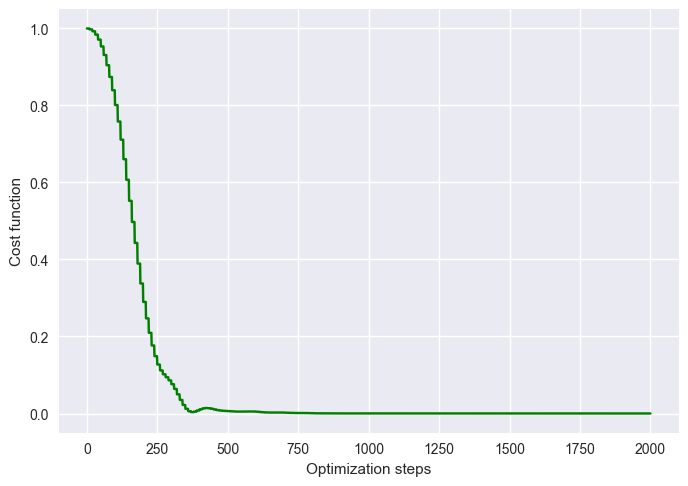

Cost history:
[0.9999417843595525, 0.9999417843593608, 0.9999417843596217, 0.9999417843596439, 0.9999417843590422, 0.9999417843596702, 0.9999417843595911, 0.9999417843596956, 0.99994178435962, 0.9999417843596009, 0.9975020381322166, 0.997502038130897, 0.997502038132653, 0.9975020381328056, 0.997502038128782, 0.9975020381332081, 0.9975020381322043, 0.9975020381327163, 0.9975020381330639, 0.9975020381326668, 0.9926080419233579, 0.9926080419210019, 0.9926080419240264, 0.9926080419243632, 0.9926080419173372, 0.9926080419253434, 0.9926080419229323, 0.9926080419236746, 0.9926080419253863, 0.9926080419243429, 0.9839660352268117, 0.983966035223058, 0.98396603522754, 0.9839660352283206, 0.9839660352177554, 0.9839660352299837, 0.9839660352256103, 0.9839660352268034, 0.9839660352306109, 0.9839660352285725, 0.9709649873167688, 0.970964987311575, 0.9709649873172049, 0.9709649873189345, 0.9709649873046805, 0.97096498732112, 0.9709649873145125, 0.9709649873162565, 0.9709649873227716, 0.97096498731957

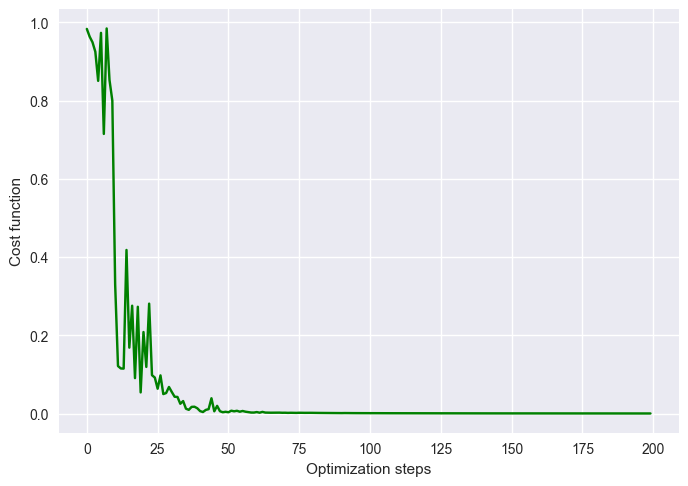

Cost history:
[0.9832554063761262, 0.9633821350931822, 0.9491283132376608, 0.9248548009494549, 0.8504455726833542, 0.9731493037213411, 0.7147698680398145, 0.9843681234051656, 0.8525826919483122, 0.7999952446714141, 0.3302108533474142, 0.12136059336372274, 0.11518775789973068, 0.11483133384703359, 0.41810083711066726, 0.16838651226242218, 0.27557971536153514, 0.09048376148201653, 0.27287159699176566, 0.0539775851751183, 0.20831331774061868, 0.11909729412091397, 0.2808796578347249, 0.09801506504812285, 0.09192007131843227, 0.06338208568425796, 0.09747195607017467, 0.049732146524045784, 0.05238302489848046, 0.06785207109686264, 0.05500682425424208, 0.042887671464189814, 0.04232525820434174, 0.02493513134348202, 0.03184923670629769, 0.012250644621301543, 0.00940622352591447, 0.016989623371882923, 0.017354490939536116, 0.013442747419213585, 0.006127051451799703, 0.0038097072288978406, 0.009202028759732861, 0.011159288561670366, 0.03896037016755982, 0.005670355953178996, 0.01957043501387734,

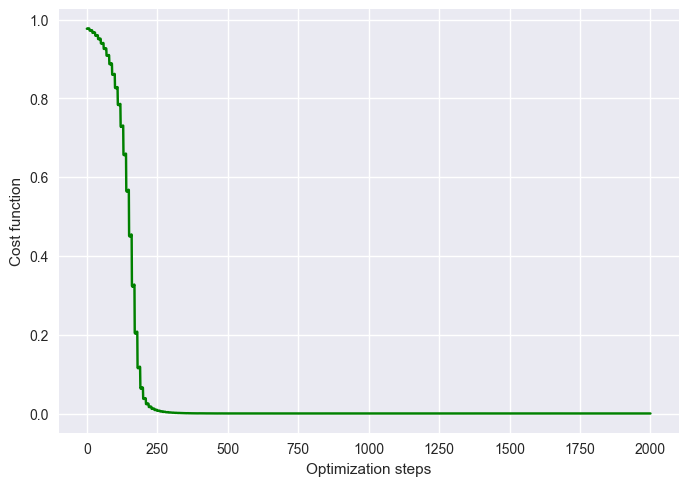

Cost history:
[0.976845944116444, 0.9765497110492941, 0.977068033435528, 0.9768516428841717, 0.9765145195573297, 0.97725960680216, 0.9766493951928519, 0.9768755064089953, 0.9774630221332672, 0.9769752254919567, 0.972303668555223, 0.9719861730209767, 0.9725467879642085, 0.9723153050957218, 0.9719400050416064, 0.9727600453126549, 0.9720799004275164, 0.9723388901667339, 0.9729988117435899, 0.972475142945249, 0.9666459925811756, 0.9663071182259212, 0.9669103955419682, 0.9666655840549334, 0.9662479590309684, 0.9671483680675287, 0.9663903160580617, 0.9666898412993467, 0.9674304821506431, 0.9668715097150437, 0.9595797409172, 0.9592199329981297, 0.9598640270116411, 0.9596097308500502, 0.9591456065079564, 0.9601302624409574, 0.9592866374011021, 0.9596360962621282, 0.9604656228188183, 0.9598740873485009, 0.9507438789038826, 0.9503640098799555, 0.9510440267062895, 0.950787041216543, 0.9502722926659132, 0.9513427868976035, 0.9504068520035069, 0.9508174821307626, 0.9517435256520308, 0.9511250899962

In [5]:
vqlssvmVectors: VQLSSVM = VQLSSVM(gamma, shots)

# methods = ['COBYLA','SLSQP', 'BFGS', 'L-BFGS-B', 'trust-constr']
methods = ["SPSA","ADAM", "COBYLA", "GD"]
costs = []
for method in methods:
    print("Method: " + method)
    vqlssvmVectors.train(xTrain, yTrain, quantumSimulation=False, verbose=False, iterations = 200, method=method)

    vqlssvmVectors.plotCost()
    cost = vqlssvmVectors.getCostHistory()
    print("Cost history:")
    print(cost)
    costs.append(cost)
    print(vqlssvmVectors.accuracy(xTest, yTest))

In [6]:
import csv
# where one column is iteration number and the other is cost

with open('costOptimizers.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Iteration'] + methods)
    for i in range(200):
        values = [i]
        for j in range(len(costs)):
            if i >= len(costs[j]):
                values.append(costs[j][-1])
            else:
                values.append(costs[j][i])
        writer.writerow(values)

In [7]:
# import pandas as pd

# # Load the first CSV file
# df1 = pd.read_csv('costOptimizers1.csv')

# # Load the second CSV file and drop its first column
# df2 = pd.read_csv('costOptimizers2.csv')
# df2 = df2.iloc[:, 1:]  # Remove the first column

# # Combine the two DataFrames
# combined_df = pd.concat([df1, df2], ignore_index=False, axis=1)

# # Save the combined DataFrame to a new CSV file
# combined_df.to_csv('costOptimizers.csv', index=False)